# Centroid-based Clustering: K-means Algorithm

Application of K-means algorithm on a simple dataset.<br>

<b>Reference/Inspiration</b>: <b><i> Pattern Recognition and Machine Learning</i></b> by <i> Christopher M. Bishop.</i> Chapter 9, Figure 9.1.<br>
<b>Dataset</b>: <a href="http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat">Old Faithful dataset</a>
<br>
<b>Model</b>: K-means Clustering<br>
<b>Algorithm</b>: Succesive optimization. A simple case of Expectation-Maximization algorithm.

## K-means Clustering

<b>Probelm Definition:</b>  Identifying groups (or clusters) in a data set.<br>

Condier a data set $\{x_1,x_2,...,x_N\}$ consisteing of $N$ observations of random $D$-dimensional variable $\mathbf{x}$. Our goal is to group these observations into a given number of $K$ clusters. Notice that there are only independent variables and no dependent variables $\{y\}$ so to speak.
<br>
<br>
A group can be imagined as a set of data points such that the members of the group are closer to each other compared to the data points outside the group. For this exercise, a simple Eculidean distance is used assessing how proximity of the data points or the distance between data points. Various other measures of "distance" were extensively studied and used in different fields. A simple way of capturing the distance between points within and outside a group can be achieved by using group centers or centroids. Instead of measurig the distance between any two data points, its easy to measure the distance between a data point and the $K$ centroids.
<br>
<br>
So to formalize, the objective of clustering is to find a set of $K$ D-dimensional vectors $\boldsymbol\mu_{k}$ for $k = 1,2,...,K$, where $\mu_{k}$ represents a centroid of cluster $k$. And an indicator $r_{nk} \in \{0,1\}$, where $k = 1,2,...,K$ represents the membership of observation(data point) $n$ to cluster $k$. Note that $\displaystyle\sum_{k=1}^K r_{nk} = 1$. In other words, if data point $x_n$ is assigned to cluster $k$, then $r_{nk} = 1$, and $r_{nj} = 0 \quad \forall j \neq k$.
<br>
<br>
With this, we can define an objective function (distortion measure) give by,

$$J = \displaystyle\sum_{n=1}^N \displaystyle\sum_{k=1}^K r_{nk}\parallel\mathbf{x}_{n}-\boldsymbol\mu_{k}\parallel^2
$$
<br>
This represents the sum of squares of distance of each data point to its assigned cluster center. The objective is to find $\{r_{nk}\}$ and $\{\boldsymbol\mu_{k}\}$ that minimizes the distortion measure $J$.

<b> Algorithm:</b><br>
The above objective is achieved by iteratively solving for one of the $\{r_{nk}\}$ and $\{\boldsymbol\mu_{k}\}$, while keep the other fixed.
<ui>
<li>Step 1. Initialize the means $\boldsymbol\mu_{k}$ to random D-dimensional vectors
<li>Step 2. <b>E Step</b>:
$\quad\quad$ Evaluate the $r_{nk}$ by assignging a data point to the closest cluster $k$.
$$ r_{nk} =
  \begin{cases}
    1       & \quad \text{if } k = argmin_{j} \parallel\mathbf{x}_{n}-\boldsymbol\mu_{k}\parallel^2\\
    0  & \quad \text{otherwise.}
  \end{cases}
$$
<br>
<li>Step 3. <b>M Step</b>:
$\quad\quad$Re-estiamte the cluster centroids based on the assignment of data points to the clusters from E step.
$$
\boldsymbol\mu_k\,=\,\frac{\sum_{n}\,r_{nk}\mathbf{x}_n}{\sum_{n}\,r_{nk}}
$$
<li>Step 4. Evaluate the distortion measure $J$ and check for convergence.  If not converged, repeat from step 2.
</ui>
<br>
<br>




## Implementation of K-means algorithm using scikit-learn

The above K-means clustering algorithm is implemented using Old Faithful dataset.  For this first run, python package scikit-learn is used but for the next illustration this algorithm is implemented from with the native code using the mathc shown above.

Text(0,0.5,'Next Eruption (minutes)')

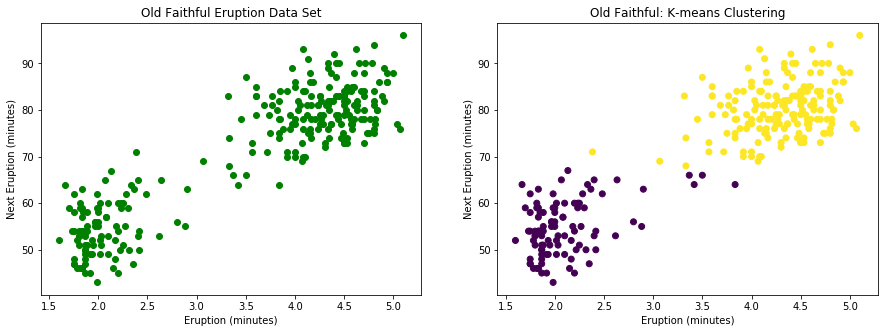

In [26]:
import numpy as np
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline


'''Load Old Faithful data set from the text file.
Old Faithful Geyser Data

Description: (From R manual):

     Waiting time between eruptions and the duration of the eruption
     for the Old Faithful geyser in Yellowstone National Park, Wyoming,
     USA.

     A data frame with 272 observations on 2 variables.

eruptions  numeric  Eruption time in mins
waiting    numeric  Waiting time to next eruption

References:

     Hardle, W. (1991) Smoothing Techniques with Implementation in S.
     New York: Springer.

     Azzalini, A. and Bowman, A. W. (1990). A look at some data on the
     Old Faithful geyser. Applied Statistics 39, 357-365.

http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat
'''
ff = np.fromfile("OldFaithfulCMU.txt", sep=" ").reshape((272,3))
#print(ff)

'''Plot Old Faithful data set'''
plt.figure( figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(ff[:,1], ff[:,2],color='g', marker='o')
plt.title("Old Faithful Eruption Data Set")
plt.xlabel("Eruption (minutes)")
plt.ylabel("Next Eruption (minutes)")

'''Perform K-means clustering and plot Old Faithful data set'''
ffClusters = KMeans(n_clusters=2, random_state=3493).fit(ff[:,1:])
plt.subplot(1,2,2)
plt.scatter(ff[:,1], ff[:,2], c=ffClusters.labels_)
plt.title("Old Faithful: K-means Clustering")
plt.xlabel("Eruption (minutes)")
plt.ylabel("Next Eruption (minutes)")

### Code for native implementation of K-means Clustering Algorithm

In [4]:
from sklearn.metrics import pairwise_distances

def expKMeans(data, means):
    '''
    Expectation step of K-means clustering algorithm.
    Assign data to cluster centers: based on euclidean distance from data point to cluster centers
    '''
    distances = pairwise_distances(data, means, metric='euclidean')
    resp = np.argmin(distances, axis=1)
    return resp

def maxKMeans(data, k, resp):
    '''
    Maximization step of K-means clustering algorithm.
    Given a cluster assignment of data, re-compute cluster centers
    '''
    means=[]
    for i in range(k):
        subData = data[resp==i]
        means.append(subData.mean(axis=0))
    return np.array(means)

def distortionMeasure(data, k, means, resp):
    '''
    Compute the distortion measure of the current cluster assignment and cluster centers.
    '''
    distM = 0
    for i in range(k):
        subData = data[resp==i]
        dist = pairwise_distances(subData, [means[i]], metric='euclidean')
        distM = distM + np.sum(dist**2)
    return distM

def perfKMeans(data, initMeans, iters=100, relgap = 1e-4, verbose=False, oldFaith=False):
    '''
    Perform K-mean Clustering Algorithm
    A step-wise implementation of K-means algorithm
    
    <oldFaith> flag is used in saving information at the end of each E and M step for plots
    '''
    K = len(initMeans)
    resp = [0] * len(data)
    if oldFaith:
        plotData = []
        plotData.append([resp, initMeans])
    means = initMeans
    
    
    distortion = 0
    distortion_old = 0
    
    for i in range(iters):
        if verbose and (i%5 ==0):
            print("Iteration: {}".format(i))
        
        resp =  expKMeans(data, means)
        if oldFaith and i<4:
            plotData.append([resp, means])
        
        means = maxKMeans(data, K, resp)
        if oldFaith and i<4:
            plotData.append([resp, means])
        
        distortion = distortionMeasure(data, K, means, resp)
        #print(distortion,"  ",means)
        #if abs(distortion_old-distortion)<= relgap:
        #    print("End of K-means. Iteration {} with distortion {:.6}".format(i, distortion))
        #    break
        #else:
        #    distortion_old=distortion
    
    print("End of K-means iterations {}. Distortion measure is {:.6}".format(i, distortion))
    if oldFaith:
        return (means, resp, plotData)
    
    else:
        return (means, resp)


## Native implemetation of K-means Algorithm

End of K-means iterations 99. Distortion measure is 79.576


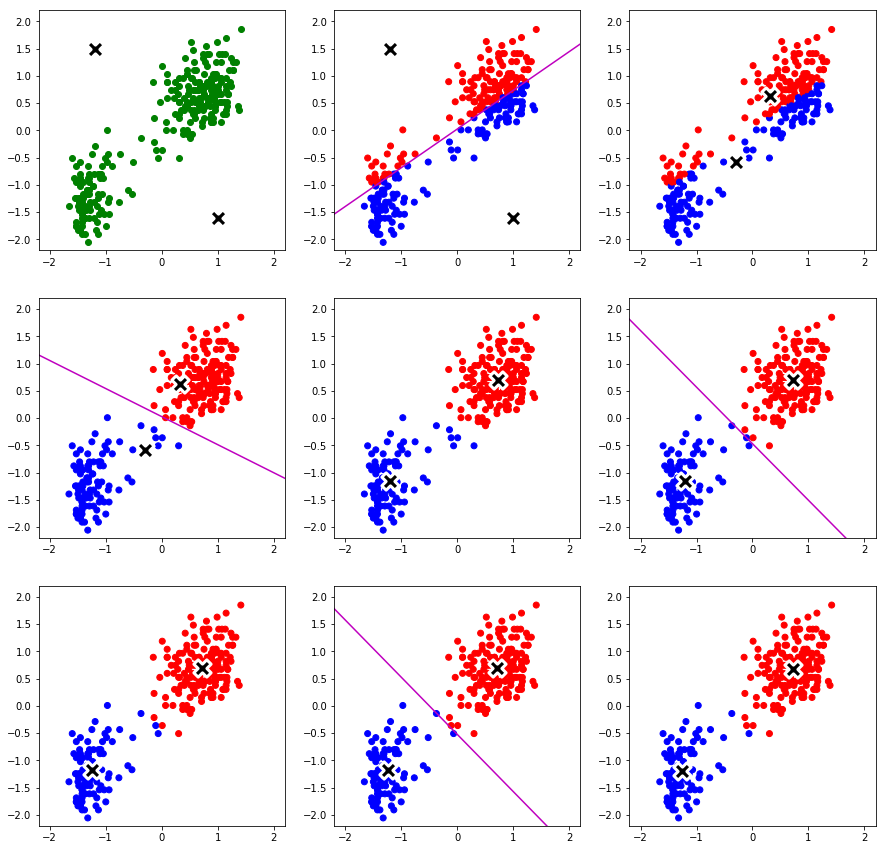

In [14]:
'''
Implement K-means on Old Faithful using native code
'''
# First rescale the data set to a standard distribution: mean 0.0 and standard deviationof 1.0
# Standardizing
from sklearn.preprocessing import StandardScaler
fitData = StandardScaler().fit(ff[:,1:])
tempd = fitData.transform(ff[:,1:])
dataOF = np.append(ff, tempd, axis=1)
#print(dataOF)

'''
For plotting bisecting lines between cluster centers
'''
def bisectLine(ctrs):
    '''return two points on the separating line between centers'''
    m = (ctrs[0,1]-ctrs[1,1])/(ctrs[0,0]-ctrs[1,0])
    c = ((ctrs[0,1]+ctrs[1,1])+(ctrs[0,0]+ctrs[1,0])/m )/2
    return np.array([[-3, 3/m+c],[3, -3/m+c]])


'''K-means Clustering'''
initCenters = np.array([[-1.2, 1.5],[1.0, -1.6]])
ms, resp, pDs = perfKMeans(dataOF[:,3:], initCenters, oldFaith=True)

colors={0: "red", 1:"blue"}
plt.figure(figsize=(15,15))
for i in range(len(pDs)):
    plt.subplot(3,3,i+1)
    if i==0:
        plt.xlim(xmax=2.2, xmin=-2.2)
        plt.ylim(ymax=2.2, ymin=-2.2)
        plt.scatter(dataOF[:,3], dataOF[:,4],c='green')
        plt.scatter(pDs[i][1][:,0], pDs[i][1][:,1], s = 300, c='black', marker="X", edgecolors="white", linewidth=3)
    else:
        plt.xlim(xmax=2.2, xmin=-2.2)
        plt.ylim(ymax=2.2, ymin=-2.2)
        plt.scatter(dataOF[:,3], dataOF[:,4],c=list(map(lambda x:colors[x], pDs[i][0])))
        plt.scatter(pDs[i][1][:,0], pDs[i][1][:,1], s = 300, c='black', marker="X", edgecolors="white", linewidth=3) #
        if (i+1)%2==0:
            b = bisectLine(pDs[i][1])
            plt.plot(b[:,0], b[:,1], 'm-')

## A second example: Seed Dataset
### K-means clustering of multidimensional dataset using native code

Below is an implementation of the native code for clustering a multidimenstional dataset for three clusters.
<br><br>
<b>Dataset:</b> <a href="https://archive.ics.uci.edu/ml/datasets/seeds"> Seed dataset</a> from UCI Machine Learning Repository <br>
<u>Data Set Information:</u>
The examined group (seeds) comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for 
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin. 

The data set can be used for the tasks of classification and cluster analysis.<br>
Attribute Information:
To construct the data, seven geometric parameters of wheat kernels were measured: 
1. area A, 
2. perimeter P, 
3. compactness C = 4*pi*A/P^2, 
4. length of kernel, 
5. width of kernel, 
6. asymmetry coefficient 
7. length of kernel groove.

All of these parameters were real-valued continuous.

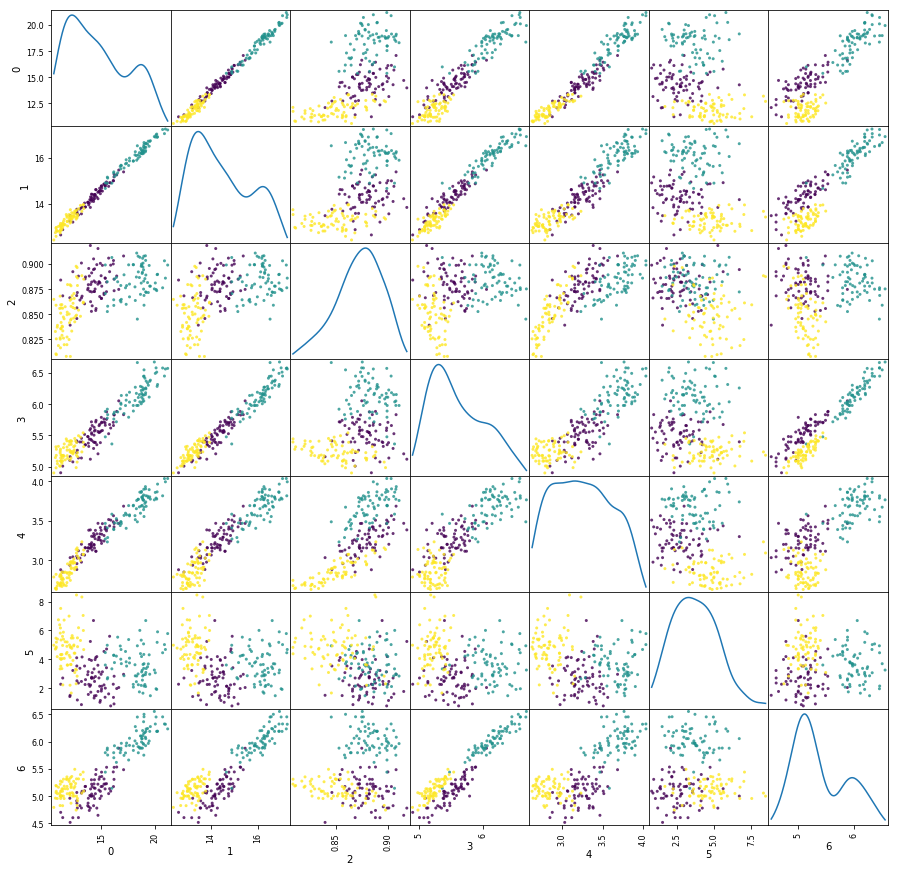

In [23]:
import pandas as pd
#from pandas.plotting import scatter_matrix

wheat = np.fromfile("seeds_dataset.txt", sep=" ").reshape((210,8))
#print(wheat)

wheat1 = pd.DataFrame(wheat)
y=wheat1[7]
del wheat1[7]
#print(wheat1)
a = pd.plotting.scatter_matrix(wheat1, alpha=0.8, figsize=(15,15),diagonal='kde', c=y)

End of K-means iterations 99. Distortion measure is 587.319


//anaconda/envs/sklearnenv/lib/python3.5/site-packages/ipykernel_launcher.py:10: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  # Remove the CWD from sys.path while we load stuff.


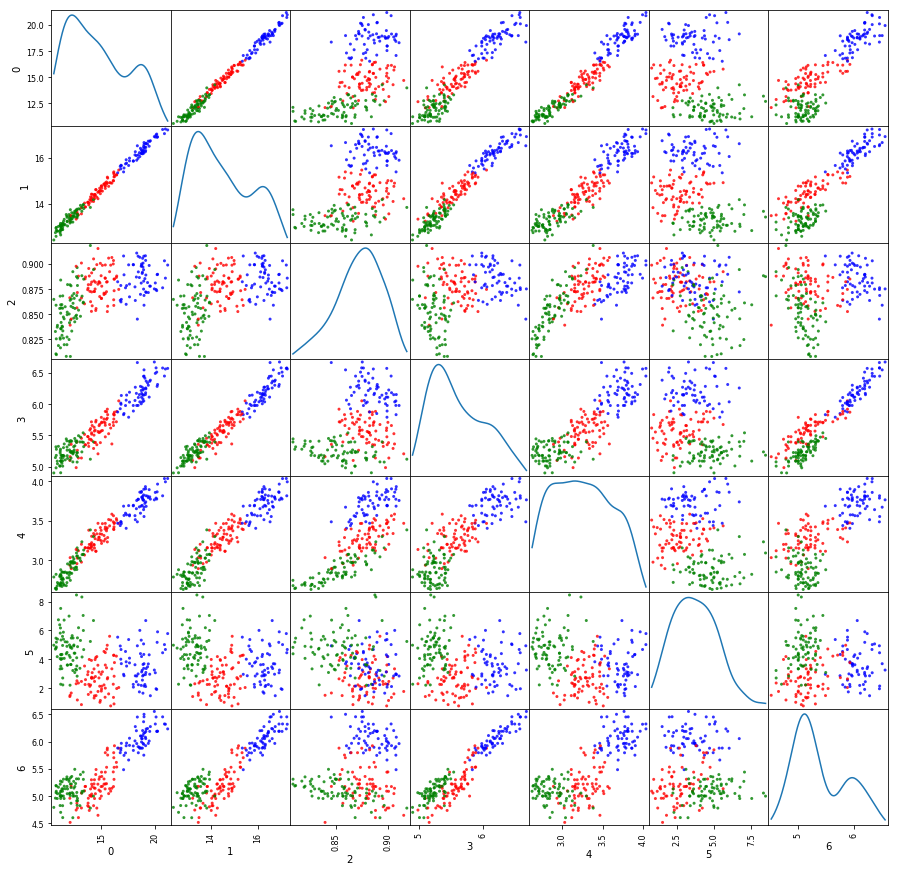

In [24]:
'''
Implement K-means on Seed Dataset using native code
'''
initCenters = [wheat[33,:-1]+0.02, wheat[89,:-1]+0.02, wheat[190,:-1]+0.02]
M1s, R1s = perfKMeans(wheat[:,:-1], initCenters)

#print(R1s)
#print(wheat[:,-1])
colors={0: "red", 1:"blue", 2:"green"}
a = pd.scatter_matrix(wheat1, alpha=0.8, figsize=(15,15),diagonal='kde', c=list(map(lambda x:colors[x], R1s)))

In [25]:
#Performance
print(np.sum(R1s==(wheat[:,-1]-1))/len(R1s))

0.895238095238
